In [5]:
import geopandas as gpd
mapslink = "https://github.com/2025DACSS-CSSmeths/HW1_repo/raw/refs/heads/main/cia.gpkg"
df = gpd.read_file(mapslink)

In [6]:
df

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,health_risk_score,geometry
0,Afghanistan,Afghanistan,South Asia,5.5,23.3,0.01,2,3.average,3.(15-30],0,1.very low,7.5,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
1,Algeria,Algeria,Africa,27.4,21.0,0.59,2,3.average,3.(15-30],0,1.very low,29.4,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
2,Azerbaijan,Azerbaijan,Middle East,19.9,24.0,1.38,2,3.average,3.(15-30],0,1.very low,21.9,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
3,Albania,Albania,Europe,21.7,22.4,4.40,2,3.average,3.(15-30],2,3.average,25.7,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
4,Armenia,Armenia,Middle East,20.2,25.5,3.77,2,3.average,3.(15-30],1,2.low,23.2,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Namibia,Namibia,Africa,17.2,15.1,2.38,1,2.low,3.(15-30],1,2.low,19.2,"MULTIPOLYGON (((14.52485 -22.69207, 14.5274 -2..."
143,Yemen,Yemen,Middle East,17.1,20.3,0.02,2,3.average,3.(15-30],0,1.very low,19.1,"MULTIPOLYGON (((48.68639 14.0375, 48.61 14.044..."
144,Zambia,Zambia,Africa,8.1,14.4,3.82,1,2.low,2.(5-15],1,2.low,10.1,"MULTIPOLYGON (((30.21302 -14.98172, 30.21917 -..."
145,Zimbabwe,Zimbabwe,Africa,15.5,11.7,3.11,1,2.low,2.(5-15],1,2.low,17.5,"MULTIPOLYGON (((32.48888 -21.34445, 32.46541 -..."


In [7]:
# Calculate the health risk score for each country
df["health_risk_score"] = df["tobacco_code"] + df["alcohol_code"] + df["obesityAdults_rate"]

# Sort countries by health risk score in ascending order and select top 10
BestCountries = df.sort_values(by="health_risk_score").head(10)

# Display the result
print(BestCountries)



         COUNTRY         name                   region  obesityAdults_rate  \
44      Ethiopia     Ethiopia                   Africa                 4.5   
42       Eritrea      Eritrea                   Africa                 5.0   
141      Vietnam      Vietnam  East and Southeast Asia                 2.1   
94         Niger        Niger                   Africa                 5.5   
26          Chad         Chad                   Africa                 6.1   
82        Malawi       Malawi                   Africa                 5.8   
121    Singapore    Singapore  East and Southeast Asia                 6.1   
99         Nepal        Nepal               South Asia                 4.1   
23       Burundi      Burundi                   Africa                 5.4   
0    Afghanistan  Afghanistan               South Asia                 5.5   

     TobaccoUse_perc  Alcohol_LitersPerCap  tobacco_code tobacco_levels  \
44               5.1                  1.16             0     1.ver

<Axes: >

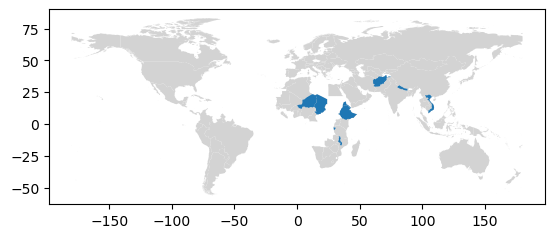

In [9]:
base=df.plot(color='lightgrey')
BestCountries.plot(ax=base)

<Axes: >

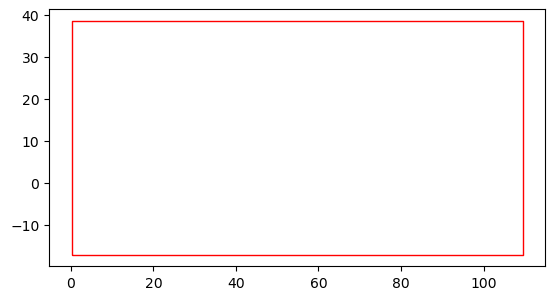

In [10]:
maskToClip=BestCountries.dissolve().envelope
maskToClip.plot(color='white',edgecolor='red')

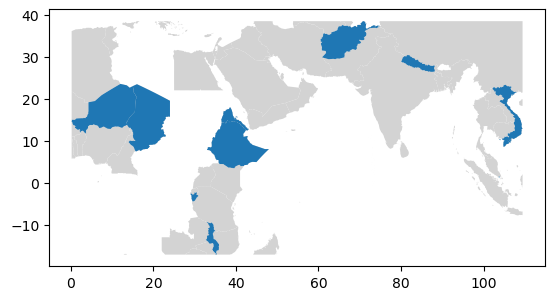

In [12]:
# new map
import matplotlib.pyplot as plt
miniWorld=df.clip(maskToClip)
# then
base=miniWorld.plot(color='lightgrey')

BestCountries.plot(ax=base)
plt.show()

In [14]:
allCoords=[x.coords[:][0] for x in BestCountries.representative_point()]
allCoords

[(38.99488193529696, 9.13499927520752),
 (38.0874970729557, 15.17777681350708),
 (107.86540619697351, 15.933401107788086),
 (9.8919770923853, 17.56208038330078),
 (18.55982626888577, 15.439477920532227),
 (33.764367207015425, -13.259028434753418),
 (103.82054994412292, 1.3497220277786255),
 (83.08470576645198, 28.399438858032227),
 (29.931772499612542, -3.3760846853256226),
 (65.2007869412316, 33.93967628479004)]

In [15]:
BestCountries=BestCountries.assign(coordinates=allCoords)
BestCountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,health_risk_score,geometry,coordinates
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,4.5,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36...","(38.99488193529696, 9.13499927520752)"
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,5.0,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...","(38.0874970729557, 15.17777681350708)"
141,Vietnam,Vietnam,East and Southeast Asia,2.1,24.8,3.41,2,3.average,3.(15-30],1,2.low,5.1,"MULTIPOLYGON (((106.45821 11.66586, 106.4483 1...","(107.86540619697351, 15.933401107788086)"
94,Niger,Niger,Africa,5.5,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,5.5,"MULTIPOLYGON (((7.02806 12.99577, 6.94222 12.9...","(9.8919770923853, 17.56208038330078)"
26,Chad,Chad,Africa,6.1,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,6.1,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9...","(18.55982626888577, 15.439477920532227)"
82,Malawi,Malawi,Africa,5.8,10.8,2.04,0,1.very low,2.(5-15],1,2.low,6.8,"MULTIPOLYGON (((33.22223 -14.01257, 33.20451 -...","(33.764367207015425, -13.259028434753418)"
121,Singapore,Singapore,East and Southeast Asia,6.1,16.5,1.81,1,2.low,3.(15-30],0,1.very low,7.1,"MULTIPOLYGON (((103.99054 1.38329, 103.99795 1...","(103.82054994412292, 1.3497220277786255)"
99,Nepal,Nepal,South Asia,4.1,30.4,0.36,3,4.high,4. (30-40],0,1.very low,7.1,"MULTIPOLYGON (((82.7011 27.71111, 82.65791 27....","(83.08470576645198, 28.399438858032227)"
23,Burundi,Burundi,Africa,5.4,11.8,4.07,1,2.low,2.(5-15],1,2.low,7.4,"MULTIPOLYGON (((30.84366 -2.97879, 30.83723 -2...","(29.931772499612542, -3.3760846853256226)"
0,Afghanistan,Afghanistan,South Asia,5.5,23.3,0.01,2,3.average,3.(15-30],0,1.very low,7.5,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35...","(65.2007869412316, 33.93967628479004)"


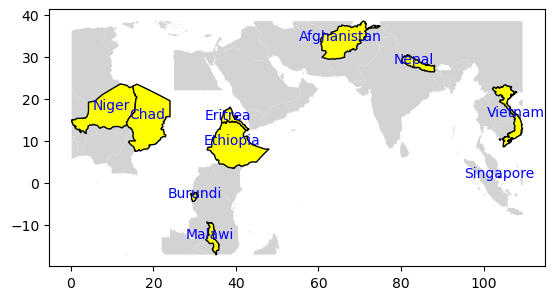

In [16]:
base=miniWorld.plot(color='lightgrey')
BestCountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in BestCountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')